#### Traffic signs Lab

1) adding contrast correction  (different parameters tested)  
2) fixed dropout (turn off at prediction)  

CLAHE - 4, (8,8) - accuracy around 0.97-0.975  
CLAHE - 1, (8,8) - accuracy around 0.97-0.98    
CLAHE - 1, (4,4) - accuracy around 0.97-0.98
CLAHE - 4, (4,4) - accuracy around 0.97-0.98  
CLAHE - 4, (16,16) - accuracy around 0.97-0.98  



## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

100%|██████████| 43/43 [00:00<00:00, 2705.52it/s]


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples 

       180 Speed limit (20km/h)
      1980 Speed limit (30km/h)
      2010 Speed limit (50km/h)
      1260 Speed limit (60km/h)
      1770 Speed limit (70km/h)
      1650 Speed limit (80km/h)
       360 End of speed limit (80km/h)
      1290 Speed limit (100km/h)
      1260 Speed limit (120km/h)
      1320 No passing
      1800 No passing for vehicles over 3.5 metric tons
      1170 Right-of-way at the next intersection
      1890 Priority road
      1920 Yield
       690 Stop
       540 No vehicles
       360 Vehicles over 3.5 metric tons prohibited
       990 No entry
      1080 General caution
       180 Dangerous curve to the left
       300 Dangerous curve to the right
       270 Double curve
       330 Bumpy road
       450 Slippery road
       240 Road narrows on the right
      1350 Road work
       540 Traffic signals
       210 Pedestrians
       480 Children 

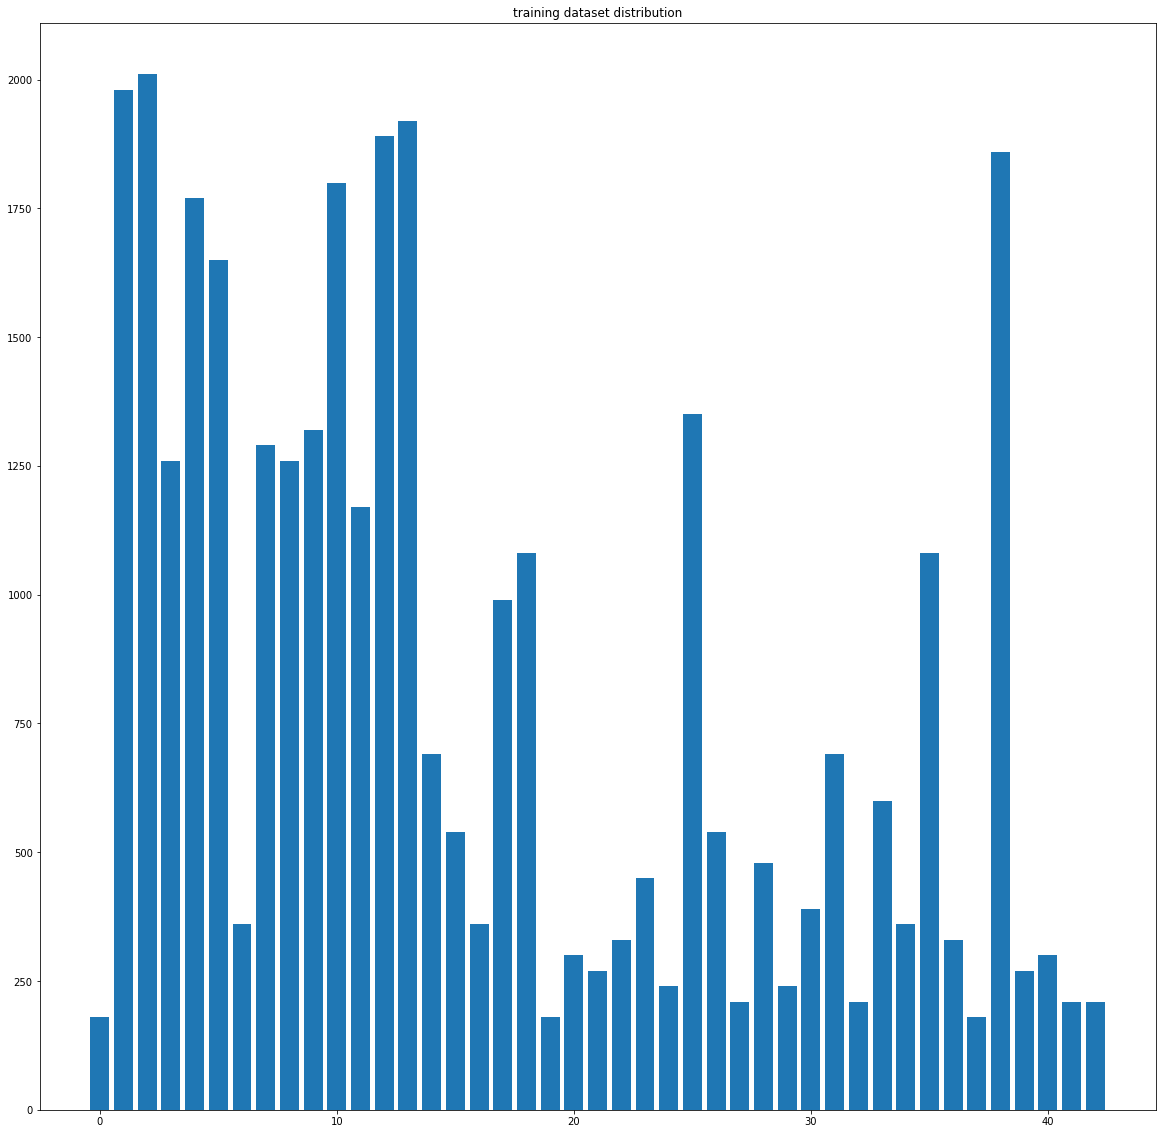

100%|██████████| 43/43 [00:00<00:00, 2674.15it/s]

Training set categories 43
max / min of train images 0 255
        30 Speed limit (20km/h)
       240 Speed limit (30km/h)
       240 Speed limit (50km/h)
       150 Speed limit (60km/h)
       210 Speed limit (70km/h)
       210 Speed limit (80km/h)
        60 End of speed limit (80km/h)
       150 Speed limit (100km/h)
       150 Speed limit (120km/h)
       150 No passing
       210 No passing for vehicles over 3.5 metric tons
       150 Right-of-way at the next intersection
       210 Priority road
       240 Yield
        90 Stop
        90 No vehicles
        60 Vehicles over 3.5 metric tons prohibited
       120 No entry
       120 General caution
        30 Dangerous curve to the left
        60 Dangerous curve to the right
        60 Double curve
        60 Bumpy road
        60 Slippery road
        30 Road narrows on the right
       150 Road work
        60 Traffic signals
        30 Pedestrians
        60 Children crossing
        30 Bicycles crossing
        60 Beware of 

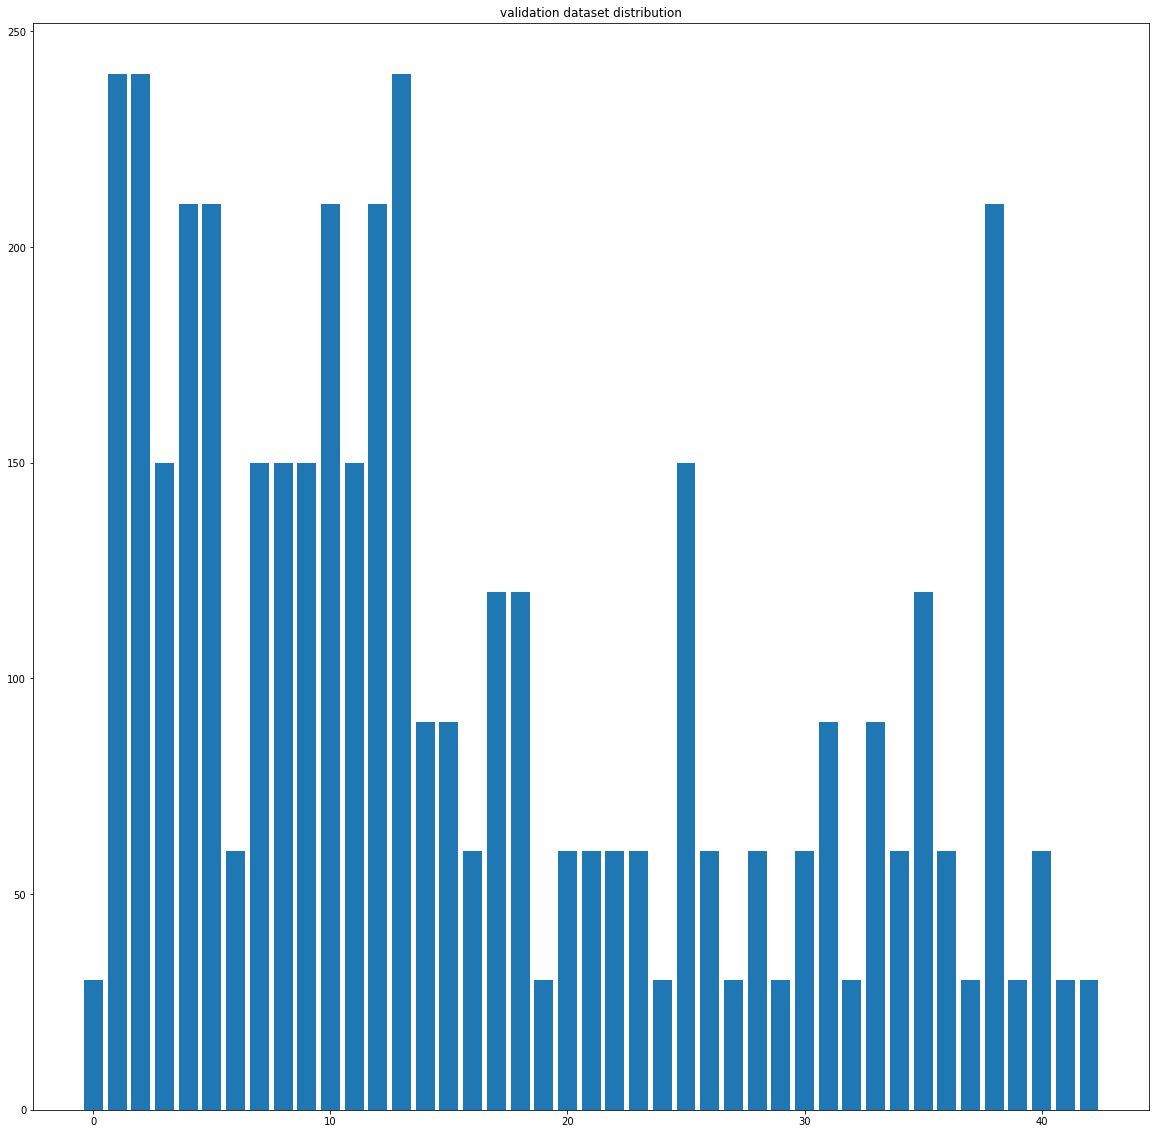

100%|██████████| 43/43 [00:00<00:00, 2311.09it/s]


        60 Speed limit (20km/h)
       720 Speed limit (30km/h)
       750 Speed limit (50km/h)
       450 Speed limit (60km/h)
       660 Speed limit (70km/h)
       630 Speed limit (80km/h)
       150 End of speed limit (80km/h)
       450 Speed limit (100km/h)
       450 Speed limit (120km/h)
       480 No passing
       660 No passing for vehicles over 3.5 metric tons
       420 Right-of-way at the next intersection
       690 Priority road
       720 Yield
       270 Stop
       210 No vehicles
       150 Vehicles over 3.5 metric tons prohibited
       360 No entry
       390 General caution
        60 Dangerous curve to the left
        90 Dangerous curve to the right
        90 Double curve
       120 Bumpy road
       150 Slippery road
        90 Road narrows on the right
       480 Road work
       180 Traffic signals
        60 Pedestrians
       150 Children crossing
        90 Bicycles crossing
       150 Beware of ice/snow
       270 Wild animals crossing
        60 End of

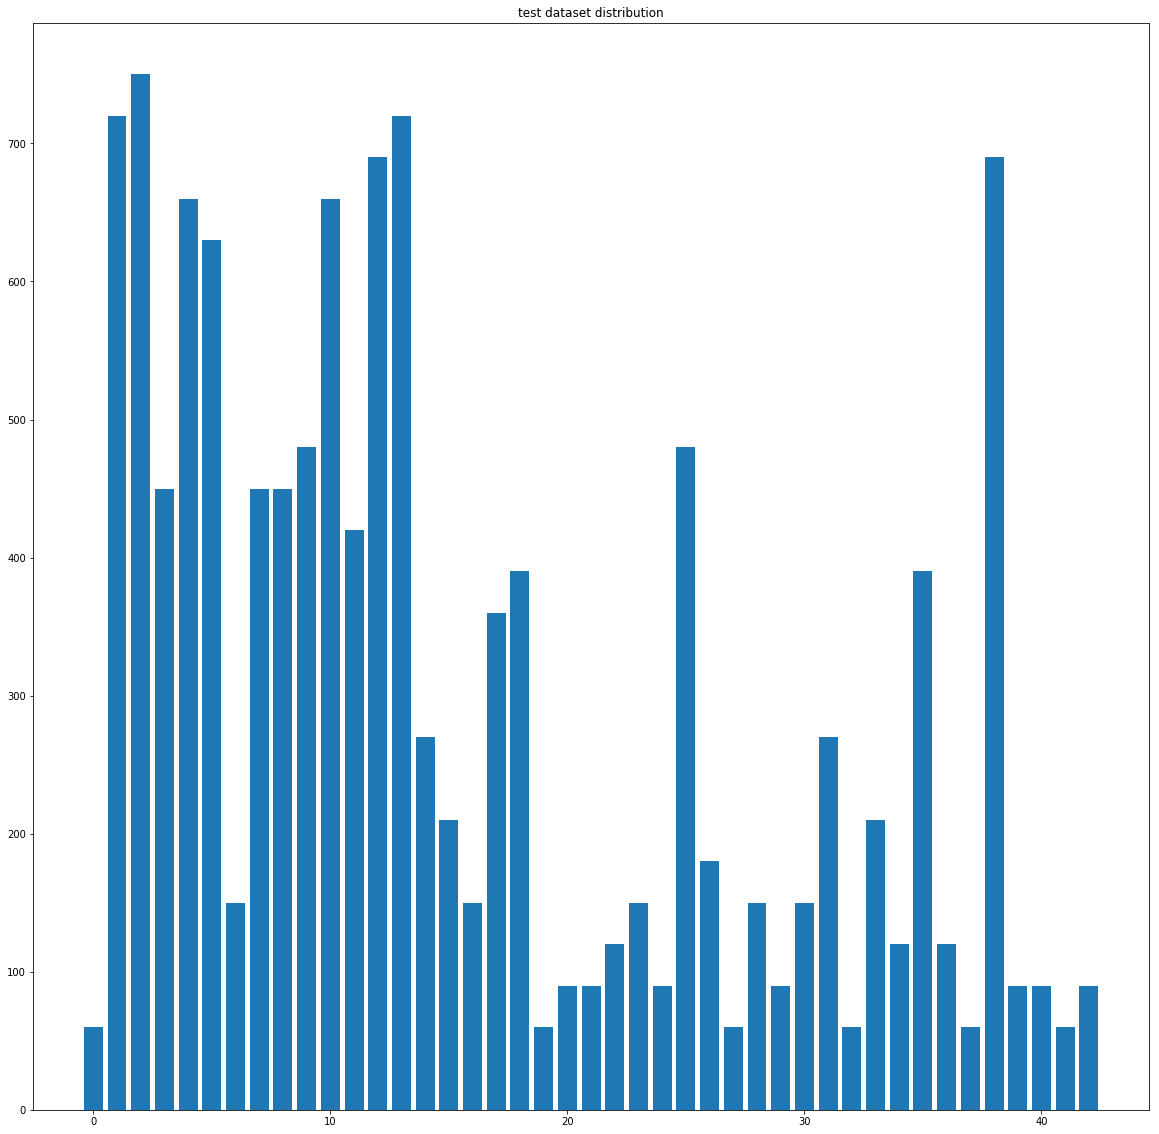

In [1]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm
import random
import cv2

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples \n".format(len(X_test)))

#checking numer of categories

categories, counts = np.unique(y_train, return_counts=True, axis=0)
x = pd.read_csv('signnames.csv')

for i in tqdm(range(len(counts))):
    print ('%10s' % counts[i], x.iloc[i][1])

print ('\n')

bar_figure = plt.figure(figsize=(20,20))
plt.title("training dataset distribution")
plt.bar(categories,counts)
plt.savefig("training.png")
plt.show()


print("Training set categories", len(categories))

#check value image range
print("max / min of train images", np.min(X_train), np.max(X_train))



categories, counts = np.unique(y_valid, return_counts=True, axis=0)
x = pd.read_csv('signnames.csv')

for i in tqdm(range(len(counts))):
    print ('%10s' % counts[i], x.iloc[i][1])

print ('\n')

bar_figure2 = plt.figure(figsize=(20,20))
plt.title("validation dataset distribution")
plt.bar(categories,counts)
plt.savefig("validation.png")
plt.show()


categories, counts = np.unique(y_test, return_counts=True, axis=0)
x = pd.read_csv('signnames.csv')

for i in tqdm(range(len(counts))):
    print ('%10s' % counts[i], x.iloc[i][1])

print ('\n')

bar_figure2 = plt.figure(figsize=(20,20))
plt.title("test dataset distribution")
plt.bar(categories,counts)
plt.savefig("test.png")
plt.show()






42
58.5524088542
31.6028906276


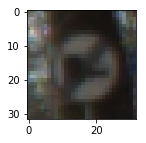

In [2]:

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image, cmap=plt.get_cmap("gray"))
print(y_train[index])
print(X_train[index].mean())
print(X_train[index].std())

In [3]:
#gamma correction

temp = []

def histogram_change(img):
    out =[]
    limg = np.array(img)
    #plt.imshow(img)
    #plt.show()
    #print (type(img))
    
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l  = lab[..., 0]
    a, b = lab[...,1], lab[...,2]
    
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
    out = clahe.apply(l)
 
    #plt.imshow(out)
    #plt.show()
    #print (type(out))
    
    limg[...,0] = out
    limg[...,1] = a
    limg[...,2] = b
    
    final_out = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    #plt.imshow(final_out)
    #plt.show()
    
    return final_out

for image in tqdm(X_train):
    image3 = image
    image_mean = image3.mean()
    contrast = image3.std() 
    image3 = histogram_change(image3)
    temp.append(image3)
X_train = temp
temp = []

for image in tqdm(X_valid):
    image3 = image
    image_mean = image3.mean()
    contrast = image3.std() 
    image3 = histogram_change(image3)
    temp.append(image3)
X_valid = temp

temp = []

for image in tqdm(X_test):
    image3 = image
    image_mean = image3.mean()
    contrast = image3.std() 
    image3 = histogram_change(image3)
    temp.append(image3)
X_test = temp

100%|██████████| 12630/12630 [00:02<00:00, 4690.25it/s]


7
82.9264322917


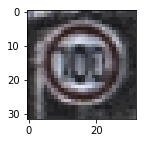

In [4]:
# check if brigtness has been averaged

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])
print(X_train[index].mean())



quantity in this bin 180
difference 1830
additional elements (1830, 32, 32, 3)
moj bin (180, 32, 32, 3)
new array shape (2010, 32, 32, 3)


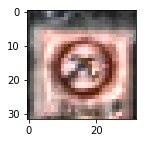




quantity in this bin 1980
difference 30
additional elements (30, 32, 32, 3)
moj bin (1980, 32, 32, 3)
new array shape (2010, 32, 32, 3)


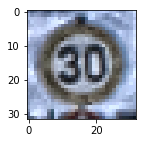




quantity in this bin 2010
difference 0
additional elements (0, 32, 32, 3)
moj bin (2010, 32, 32, 3)


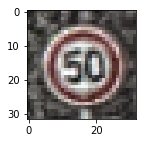




quantity in this bin 1260
difference 750
additional elements (750, 32, 32, 3)
moj bin (1260, 32, 32, 3)
new array shape (2010, 32, 32, 3)


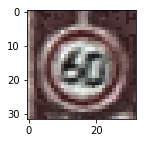




quantity in this bin 1770
difference 240
additional elements (240, 32, 32, 3)
moj bin (1770, 32, 32, 3)
new array shape (2010, 32, 32, 3)


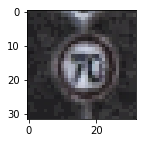




quantity in this bin 1650
difference 360
additional elements (360, 32, 32, 3)
moj bin (1650, 32, 32, 3)
new array shape (2010, 32, 32, 3)


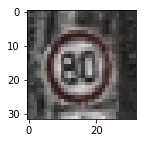




quantity in this bin 360
difference 1650
additional elements (1650, 32, 32, 3)
moj bin (360, 32, 32, 3)
new array shape (2010, 32, 32, 3)


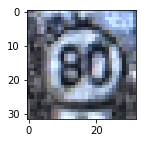




quantity in this bin 1290
difference 720
additional elements (720, 32, 32, 3)
moj bin (1290, 32, 32, 3)
new array shape (2010, 32, 32, 3)


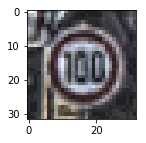




quantity in this bin 1260
difference 750
additional elements (750, 32, 32, 3)
moj bin (1260, 32, 32, 3)
new array shape (2010, 32, 32, 3)


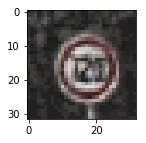




quantity in this bin 1320
difference 690
additional elements (690, 32, 32, 3)
moj bin (1320, 32, 32, 3)
new array shape (2010, 32, 32, 3)


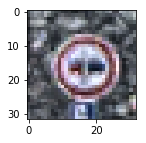




quantity in this bin 1800
difference 210
additional elements (210, 32, 32, 3)
moj bin (1800, 32, 32, 3)
new array shape (2010, 32, 32, 3)


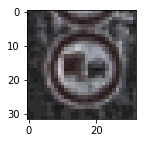




quantity in this bin 1170
difference 840
additional elements (840, 32, 32, 3)
moj bin (1170, 32, 32, 3)
new array shape (2010, 32, 32, 3)


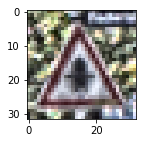




quantity in this bin 1890
difference 120
additional elements (120, 32, 32, 3)
moj bin (1890, 32, 32, 3)
new array shape (2010, 32, 32, 3)


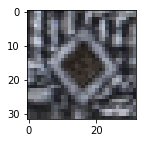




quantity in this bin 1920
difference 90
additional elements (90, 32, 32, 3)
moj bin (1920, 32, 32, 3)
new array shape (2010, 32, 32, 3)


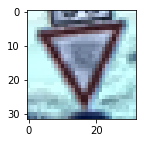




quantity in this bin 690
difference 1320
additional elements (1320, 32, 32, 3)
moj bin (690, 32, 32, 3)
new array shape (2010, 32, 32, 3)


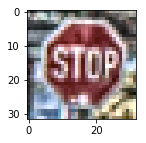




quantity in this bin 540
difference 1470
additional elements (1470, 32, 32, 3)
moj bin (540, 32, 32, 3)
new array shape (2010, 32, 32, 3)


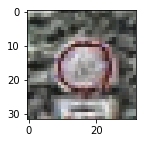




quantity in this bin 360
difference 1650
additional elements (1650, 32, 32, 3)
moj bin (360, 32, 32, 3)
new array shape (2010, 32, 32, 3)


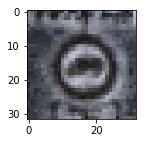




quantity in this bin 990
difference 1020
additional elements (1020, 32, 32, 3)
moj bin (990, 32, 32, 3)
new array shape (2010, 32, 32, 3)


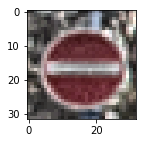




quantity in this bin 1080
difference 930
additional elements (930, 32, 32, 3)
moj bin (1080, 32, 32, 3)
new array shape (2010, 32, 32, 3)


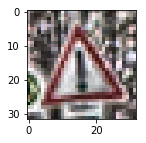




quantity in this bin 180
difference 1830
additional elements (1830, 32, 32, 3)
moj bin (180, 32, 32, 3)
new array shape (2010, 32, 32, 3)


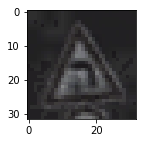




quantity in this bin 300
difference 1710
additional elements (1710, 32, 32, 3)
moj bin (300, 32, 32, 3)
new array shape (2010, 32, 32, 3)


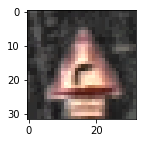




quantity in this bin 270
difference 1740
additional elements (1740, 32, 32, 3)
moj bin (270, 32, 32, 3)
new array shape (2010, 32, 32, 3)


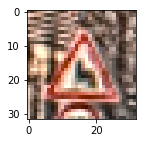




quantity in this bin 330
difference 1680
additional elements (1680, 32, 32, 3)
moj bin (330, 32, 32, 3)
new array shape (2010, 32, 32, 3)


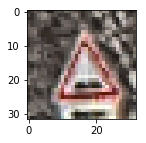




quantity in this bin 450
difference 1560
additional elements (1560, 32, 32, 3)
moj bin (450, 32, 32, 3)
new array shape (2010, 32, 32, 3)


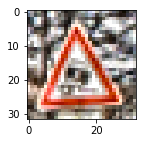




quantity in this bin 240
difference 1770
additional elements (1770, 32, 32, 3)
moj bin (240, 32, 32, 3)
new array shape (2010, 32, 32, 3)


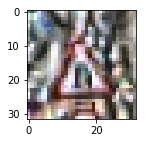




quantity in this bin 1350
difference 660
additional elements (660, 32, 32, 3)
moj bin (1350, 32, 32, 3)
new array shape (2010, 32, 32, 3)


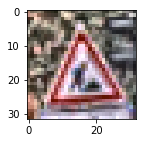




quantity in this bin 540
difference 1470
additional elements (1470, 32, 32, 3)
moj bin (540, 32, 32, 3)
new array shape (2010, 32, 32, 3)


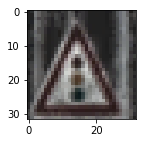




quantity in this bin 210
difference 1800
additional elements (1800, 32, 32, 3)
moj bin (210, 32, 32, 3)
new array shape (2010, 32, 32, 3)


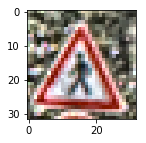




quantity in this bin 480
difference 1530
additional elements (1530, 32, 32, 3)
moj bin (480, 32, 32, 3)
new array shape (2010, 32, 32, 3)


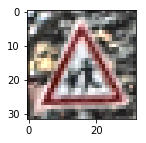




quantity in this bin 240
difference 1770
additional elements (1770, 32, 32, 3)
moj bin (240, 32, 32, 3)
new array shape (2010, 32, 32, 3)


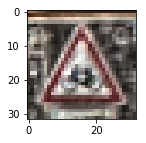




quantity in this bin 390
difference 1620
additional elements (1620, 32, 32, 3)
moj bin (390, 32, 32, 3)
new array shape (2010, 32, 32, 3)


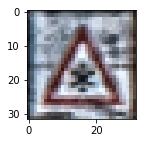




quantity in this bin 690
difference 1320
additional elements (1320, 32, 32, 3)
moj bin (690, 32, 32, 3)
new array shape (2010, 32, 32, 3)


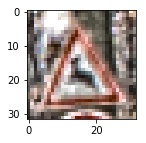




quantity in this bin 210
difference 1800
additional elements (1800, 32, 32, 3)
moj bin (210, 32, 32, 3)
new array shape (2010, 32, 32, 3)


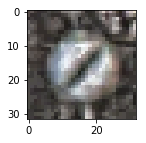




quantity in this bin 599
difference 1411
additional elements (1411, 32, 32, 3)
moj bin (599, 32, 32, 3)
new array shape (2010, 32, 32, 3)


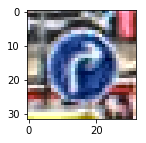




quantity in this bin 360
difference 1650
additional elements (1650, 32, 32, 3)
moj bin (360, 32, 32, 3)
new array shape (2010, 32, 32, 3)


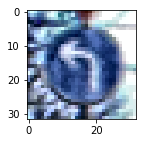




quantity in this bin 1080
difference 930
additional elements (930, 32, 32, 3)
moj bin (1080, 32, 32, 3)
new array shape (2010, 32, 32, 3)


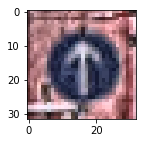




quantity in this bin 330
difference 1680
additional elements (1680, 32, 32, 3)
moj bin (330, 32, 32, 3)
new array shape (2010, 32, 32, 3)


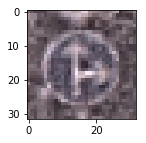




quantity in this bin 180
difference 1830
additional elements (1830, 32, 32, 3)
moj bin (180, 32, 32, 3)
new array shape (2010, 32, 32, 3)


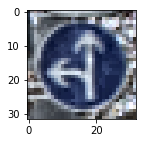




quantity in this bin 1860
difference 150
additional elements (150, 32, 32, 3)
moj bin (1860, 32, 32, 3)
new array shape (2010, 32, 32, 3)


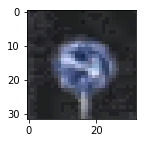




quantity in this bin 270
difference 1740
additional elements (1740, 32, 32, 3)
moj bin (270, 32, 32, 3)
new array shape (2010, 32, 32, 3)


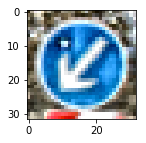




quantity in this bin 300
difference 1710
additional elements (1710, 32, 32, 3)
moj bin (300, 32, 32, 3)
new array shape (2010, 32, 32, 3)


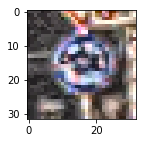




quantity in this bin 210
difference 1800
additional elements (1800, 32, 32, 3)
moj bin (210, 32, 32, 3)
new array shape (2010, 32, 32, 3)


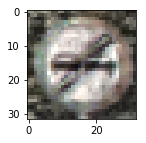




quantity in this bin 210
difference 1800
additional elements (1800, 32, 32, 3)
moj bin (210, 32, 32, 3)
new array shape (2010, 32, 32, 3)


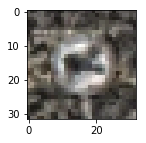




------
43
new labels quantity 86430
shape of data (43, 2010, 32, 32, 3)
shape of data (86430, 32, 32, 3)


In [5]:
#X_train, y_train = train['features'], train['labels']
#X_valid, y_valid = valid['features'], valid['labels']
#X_test, y_test = test['features'], test['labels']

tabelka_sorted = []
new_labels = []

categories, counts = np.unique(train['labels'], return_counts=True)

largest_category = max(counts) 

print('\n')

for cat in range(len(categories)):
    # select all elements from this category
    moj_bin = [a for i, a in enumerate(X_train) if y_train[i]==cat]
    moj_bin = np.array(moj_bin)
    print ("quantity in this bin", len(moj_bin))
    #calculate the difference between biggest category and this one
    difference = largest_category - len(moj_bin)
    print ("difference", difference)
    # select random elements with replacement
    additional = np.random.choice(len(moj_bin), difference, replace=True)
    
    ad = moj_bin[additional]
    
    #print("additional elements", ad)
    #print ("moj bin", moj_bin)
    
    print("additional elements", ad.shape)
    print ("moj bin", moj_bin.shape)
    

    if difference > 0:
        new = np.concatenate((moj_bin, ad), axis=0)
        print ("new array shape", new.shape)

        
    else:
        new = moj_bin

    index = random.randint(0, len(new))
    image = new[index].squeeze()
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.show()
    
    tabelka_sorted.append(new)
    moj_bin=[]
    print ('\n\n')

    
print("------")
print (len(tabelka_sorted))

#flatten array and prepare new labels

for i in range(len(tabelka_sorted)):
    for x in range(len(tabelka_sorted[i])):
        new_labels.append(i)

print ("new labels quantity", len(new_labels))
#print ("new labels", new_labels)
    
print ("shape of data", np.array(tabelka_sorted).shape)
tabelka_sorted = np.array(tabelka_sorted).reshape(len(new_labels),32,32,3)

print ("shape of data", np.array(tabelka_sorted).shape)

X_train = tabelka_sorted
y_train = new_labels

100%|██████████| 43/43 [00:00<00:00, 2830.48it/s]


Image Shape: (32, 32, 3)

Training Set:   86430 samples
      2010 Speed limit (20km/h)
      2010 Speed limit (30km/h)
      2010 Speed limit (50km/h)
      2010 Speed limit (60km/h)
      2010 Speed limit (70km/h)
      2010 Speed limit (80km/h)
      2010 End of speed limit (80km/h)
      2010 Speed limit (100km/h)
      2010 Speed limit (120km/h)
      2010 No passing
      2010 No passing for vehicles over 3.5 metric tons
      2010 Right-of-way at the next intersection
      2010 Priority road
      2010 Yield
      2010 Stop
      2010 No vehicles
      2010 Vehicles over 3.5 metric tons prohibited
      2010 No entry
      2010 General caution
      2010 Dangerous curve to the left
      2010 Dangerous curve to the right
      2010 Double curve
      2010 Bumpy road
      2010 Slippery road
      2010 Road narrows on the right
      2010 Road work
      2010 Traffic signals
      2010 Pedestrians
      2010 Children crossing
      2010 Bicycles crossing
      2010 Beware of ic

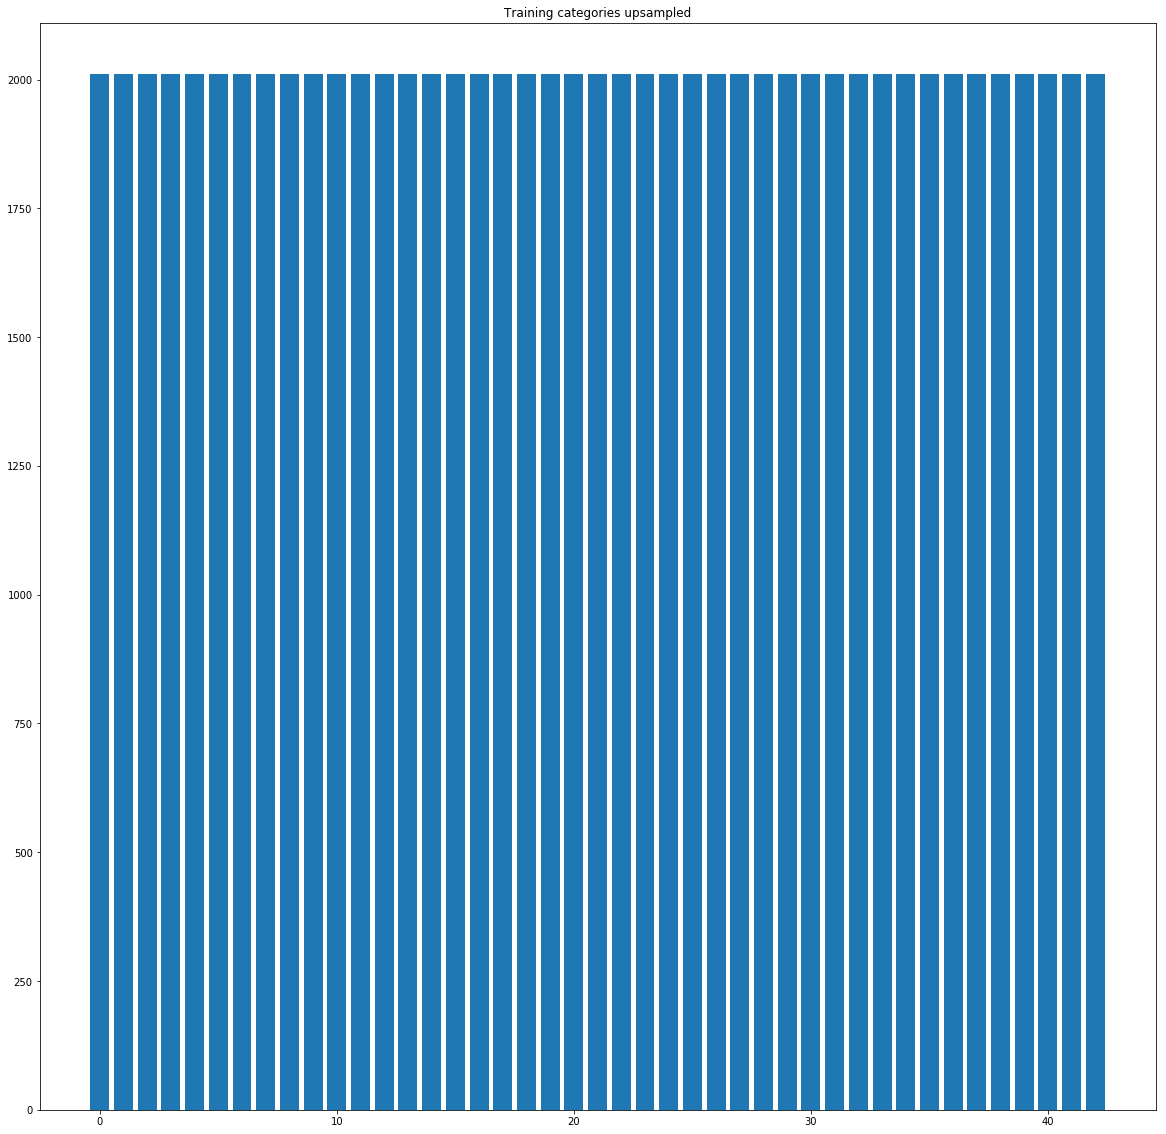

Training set categories 43
max / min of train images 0 255


In [6]:
# data statistics after upsampling

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))

#checking numer of categories

categories, counts = np.unique(y_train, return_counts=True, axis=0)
x = pd.read_csv('signnames.csv')

for i in tqdm(range(len(counts))):
    print ('%10s' % counts[i], x.iloc[i][1])

print ('\n')
plt.figure(figsize=(20,20))
plt.bar(categories,counts)
plt.title("Training categories upsampled")
plt.savefig("training2.png")
plt.show()

print("Training set categories", len(categories))

#check value image range
print("max / min of train images", np.min(X_train), np.max(X_train))


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

7


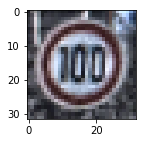

In [7]:
import random


index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

Basic normalization

In [8]:
from sklearn.utils import shuffle


X_train, y_train = shuffle(X_train, y_train)

X_train = np.float32(X_train)
X_valid = np.float32(X_valid)
X_test = np.float32(X_test)

print ("raw data")
print("max / min of train images", np.min(X_train), np.max(X_train))
print("max / min of train images", np.min(X_valid), np.max(X_valid))
print("max / min of train images", np.min(X_test), np.max(X_test))


X_train = (X_train / 255.0) - 0.5
X_valid = (X_valid / 255.0) - 0.5
X_test = (X_test / 255.0) - 0.5

print ("norm / 255 - 0.5")
print("max / min of train images", np.min(X_train), np.max(X_train))
print("max / min of train images", np.min(X_valid), np.max(X_valid))
print("max / min of train images", np.min(X_test), np.max(X_test))


KeyboardInterrupt: 

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [ ]:
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

In [ ]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    filters = tf.Variable(tf.truncated_normal([5,5,3,64], mean=mu, stddev=sigma))
    bias1 = tf.Variable(tf.zeros(64))
    strides = [1,1,1,1]
    padding = 'SAME'
    
    conv1 = tf.nn.conv2d(x,filters,strides,padding) + bias1
   
    # TODO: Activation.
    act1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # pool1 = tf.nn.max_pool(act1,ksize=[1,2,2,1],strides=[1,2,2,1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filters2 = tf.Variable(tf.truncated_normal([5,5,64,64], mean=mu, stddev=sigma))
    strides2 = [1,1,1,1]
    bias2 = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1,filters2,strides2,padding='SAME') + bias2
    act2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    
    pool1 = tf.nn.max_pool(act2,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filters3 = tf.Variable(tf.truncated_normal([3,3,64,128], mean=mu, stddev=sigma))
    strides3 = [1,1,1,1]
    bias3 = tf.Variable(tf.zeros(128))
    conv3 = tf.nn.conv2d(pool1,filters3,strides3,padding='SAME') + bias3   
    act3 = tf.nn.relu(conv3)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filters4 = tf.Variable(tf.truncated_normal([3,3,128,128], mean=mu, stddev=sigma))
    strides4 = [1,1,1,1]
    bias4 = tf.Variable(tf.zeros(128))
    conv4 = tf.nn.conv2d(conv3,filters4,strides4,padding='SAME') + bias4
    act4 = tf.nn.relu(conv4)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    pool2 = tf.nn.max_pool(act4,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')
    
    flatten_layer = flatten(pool2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    ff1_weights = tf.Variable(tf.truncated_normal([8192,120], mean=mu, stddev=sigma))
    ff1_bias = tf.Variable(tf.zeros(120))
    
    ff1 = tf.matmul(flatten_layer,ff1_weights) + ff1_bias
    
    # TODO: Activation.
    
    act3 = tf.nn.relu(ff1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    ff2_weights = tf.Variable(tf.truncated_normal([120,84], mean=mu, stddev=sigma))
    ff2_bias = tf.Variable(tf.zeros(84))
    ff2 = tf.matmul (act3, ff2_weights) + ff2_bias
    # TODO: Activation.
    
    act4 = tf.nn.relu(ff2)


    dropout = tf.nn.dropout(act4, keep_prob)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    
    log_weights = tf.Variable(tf.truncated_normal([84,43], mean=mu, stddev=sigma))
    log_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dropout,log_weights) + log_bias
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [ ]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [ ]:
best_accuracy = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        
        # saving best model possible
        if validation_accuracy > best_accuracy:
            best_accuracy = validation_accuracy
            saver.save(sess, './lenet')
            print("Model saved")
        
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.4f}".format(training_accuracy))
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print()
        
    

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))